In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [23]:
apple_stock_daily = pd.read_csv("resources/apple_stock_daily.csv")
apple_stock_daily

,Unnamed: 0,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,0,2018-05-10,187.740,190.37,190.04,45.288145,27989289.0,0.00
1,1,2018-05-11,189.490,190.06,188.59,45.116563,26212221.0,0.73
2,2,2018-05-14,189.010,189.53,188.15,45.011301,20778772.0,0.00
3,3,2018-05-15,186.780,187.07,186.44,44.602216,23695159.0,0.00
4,4,2018-05-16,186.070,188.46,188.18,45.018478,19183064.0,0.00
...,...,...,...,...,...,...,...,...
1252,1252,2023-05-02,170.090,170.35,168.54,168.540000,48425696.0,0.00
1253,1253,2023-05-03,169.500,170.92,167.45,167.450000,65136018.0,0.00
1254,1254,2023-05-04,164.890,167.04,165.79,165.790000,81235427.0,0.00
1255,1255,2023-05-05,170.975,174.30,173.57,173.570000,113453171.0,0.00


In [4]:
motorola_stock_daily = pd.read_csv("resources/motorola_stock_daily.csv")
motorola_stock_daily

,Unnamed: 0,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,0,2018-05-10,106.32,108.9200,108.75,100.779125,1517801.0,0.0
1,1,2018-05-11,108.59,108.6700,108.37,100.426977,1065483.0,0.0
2,2,2018-05-14,108.43,109.3400,107.38,99.509540,1239310.0,0.0
3,3,2018-05-15,107.02,108.0600,107.98,100.065562,1145615.0,0.0
4,4,2018-05-16,107.92,108.3500,107.30,99.435403,968471.0,0.0
...,...,...,...,...,...,...,...,...
1252,1252,2023-05-02,293.94,294.6575,293.16,293.160000,665788.0,0.0
1253,1253,2023-05-03,295.00,295.0000,288.62,288.620000,595591.0,0.0
1254,1254,2023-05-04,288.13,292.6700,290.41,290.410000,968799.0,0.0
1255,1255,2023-05-05,285.12,288.8600,281.56,281.560000,1501288.0,0.0


In [5]:
google_class_c_stock_daily = pd.read_csv("resources/google_class_c_stock_daily.csv")
google_class_c_stock_daily

,Unnamed: 0,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,0,2018-05-10,1086.030,1100.44,1097.570,54.8785,1443025.0,0.0
1,1,2018-05-11,1093.600,1101.33,1098.260,54.9130,1253665.0,0.0
2,2,2018-05-14,1100.000,1110.75,1100.200,55.0100,1518077.0,0.0
3,3,2018-05-15,1090.000,1090.05,1079.230,53.9615,1494872.0,0.0
4,4,2018-05-16,1077.310,1089.27,1081.770,54.0885,1097317.0,0.0
...,...,...,...,...,...,...,...,...
1252,1252,2023-05-02,107.660,107.73,105.980,105.9800,20343116.0,0.0
1253,1253,2023-05-03,106.220,108.13,106.120,106.1200,17116333.0,0.0
1254,1254,2023-05-04,106.160,106.30,105.210,105.2100,19780637.0,0.0
1255,1255,2023-05-05,105.320,106.44,106.215,106.2150,20710627.0,0.0


In [6]:
google_class_a_stock_daily = pd.read_csv("resources/google_class_a_stock_daily.csv")
google_class_a_stock_daily

,Unnamed: 0,Date,Open,High,Close,Adjusted Close,Volume,Dividends
0,0,2018-05-10,1095.000,1109.41,1105.47,55.2735,1820676.0,0.0
1,1,2018-05-11,1100.410,1109.01,1103.38,55.1690,1525218.0,0.0
2,2,2018-05-14,1105.570,1118.15,1106.60,55.3300,1966893.0,0.0
3,3,2018-05-15,1096.900,1099.12,1084.87,54.2435,1786926.0,0.0
4,4,2018-05-16,1085.090,1094.38,1084.09,54.2045,1281406.0,0.0
...,...,...,...,...,...,...,...,...
1252,1252,2023-05-02,107.140,107.20,105.32,105.3200,30997245.0,0.0
1253,1253,2023-05-03,105.530,107.49,105.41,105.4100,21795405.0,0.0
1254,1254,2023-05-04,105.485,105.60,104.69,104.6900,23419506.0,0.0
1255,1255,2023-05-05,104.820,105.88,105.57,105.5700,26639254.0,0.0


<Axes: xlabel='Date'>

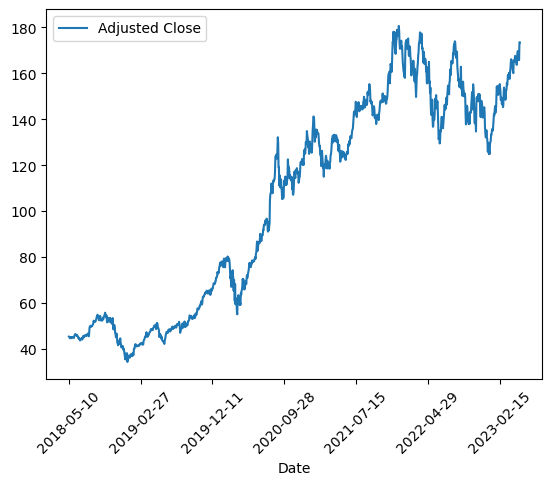

In [13]:
apple_stock_daily.plot("Date", "Adjusted Close", rot = 45)

<Axes: xlabel='Date'>

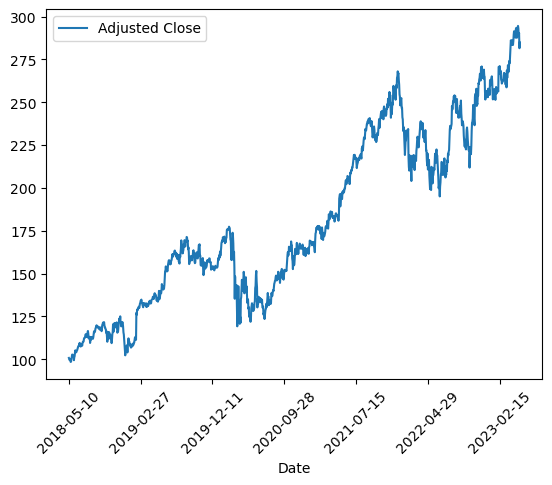

In [14]:
motorola_stock_daily.plot("Date", "Adjusted Close", rot = 45)

<Axes: xlabel='Date'>

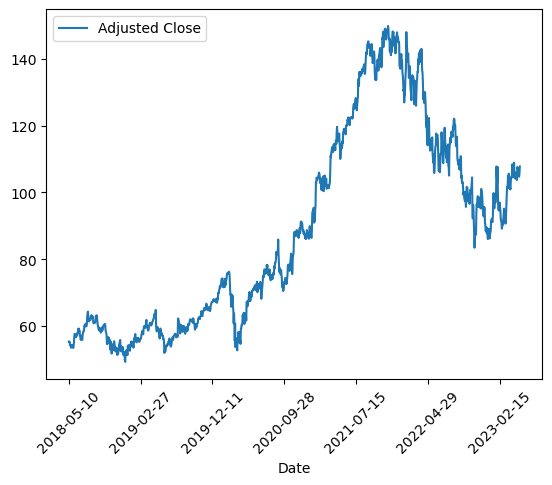

In [15]:
google_class_a_stock_daily.plot("Date", "Adjusted Close", rot = 45)

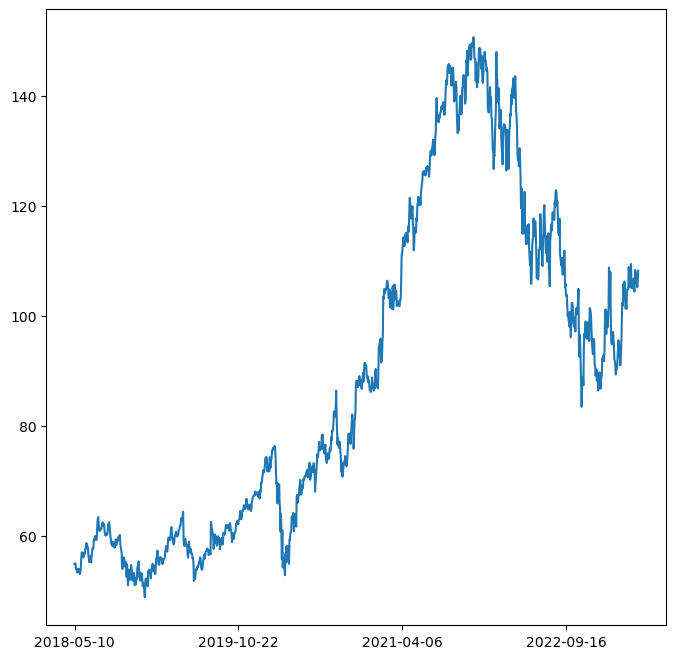

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(google_class_c_stock_daily["Date"], google_class_c_stock_daily["Adjusted Close"], label = "Google Class C")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
plt.show()

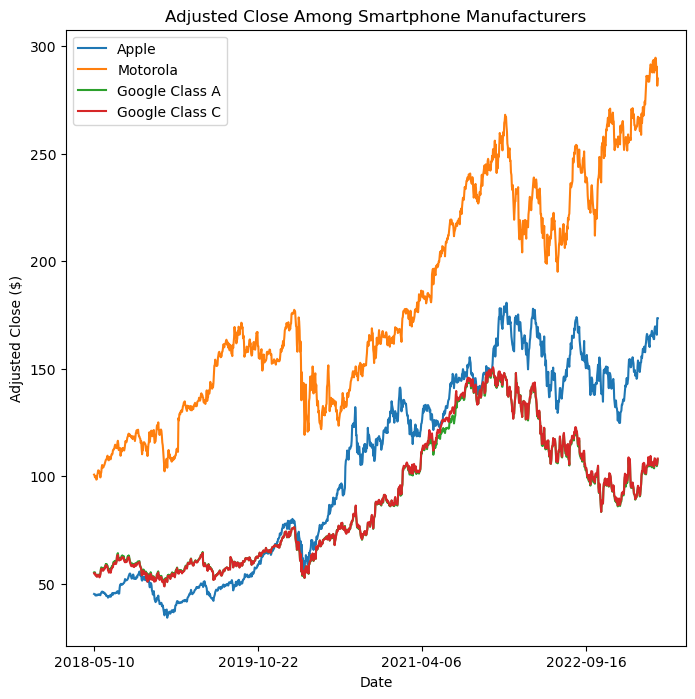

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(apple_stock_daily["Date"], apple_stock_daily["Adjusted Close"], label = "Apple")
ax.plot(motorola_stock_daily["Date"], motorola_stock_daily["Adjusted Close"], label = "Motorola")
ax.plot(google_class_a_stock_daily["Date"], google_class_a_stock_daily["Adjusted Close"], label = "Google Class A")
ax.plot(google_class_c_stock_daily["Date"], google_class_c_stock_daily["Adjusted Close"], label = "Google Class C")
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
ax.xaxis.set_major_locator(locator)
ax.legend()
plt.xlabel("Date")
plt.ylabel("Adjusted Close ($)")
plt.title("Adjusted Close Among Smartphone Manufacturers")
plt.savefig("output/adjusted_close_comparison")
plt.show()